# Tabularize time series

In this assignment, your task is to convert **time series data** into a **tabular data set**.

You need to create suitable input features from a time series containing weekly sales to be able to forecast sales for the next week.

To prepare the dataset for this assignment, please follow the guidelines in the notebook `02-create-online-retail-II-datasets.ipynb` in the `01-Create-Datasets` folder.

In [2]:
# load weekly sales dataset

import pandas as pd

filename = "online_retail_dataset.csv"

df = pd.read_csv(
    filename,
    usecols=["week", "United Kingdom"],
    parse_dates=["week"],
    index_col=["week"],
)

df.columns = ['sales']

df.head()

,sales
week,
2009-12-06,213000.35
2009-12-13,195810.04
2009-12-20,182396.74
2009-12-27,22007.77
2010-01-03,0.00


# Data analysis

First, explore the time series.

## Plot time series

In [6]:
df.head()

,sales
week,
2009-12-06,213000.35
2009-12-13,195810.04
2009-12-20,182396.74
2009-12-27,22007.77
2010-01-03,0.00


In [23]:
len(df)

106

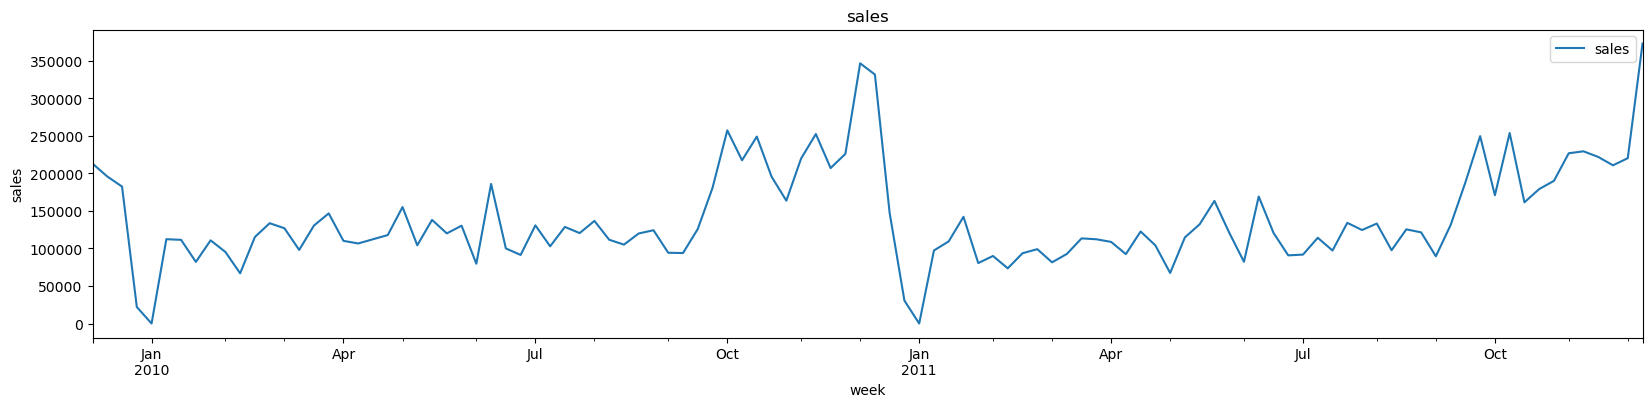

In [17]:
import matplotlib.pyplot as plt

var = df.columns[0]

df.plot(figsize=(20,4))

plt.title(var)

plt.ylabel(var)

plt.show()

## Missing data

Check if there are missing values in the time series.

In [18]:
df.isnull().sum()

sales    0
dtype: int64

## Missing timestamps

Check if there are missing timestamps in the index.

In [20]:
df_ = df.asfreq("W")

In [21]:
len(df_)

106

In [22]:
len(df)

106

## Seasonality

Does the time series show any obvious seasonal pattern?

In [ ]:
#Si, de manera anual

# Feature engineering

Now, let's begin to tabularize the data.

In [31]:
#Timestamp features

from feature_engine.creation import CyclicalFeatures

df["month"] = df.index.month
df["year"] = df.index.year
df["number_of_week"] = df.index.isocalendar().week
cyclical = CyclicalFeatures(
    variables=["month"],  # The features we want to transform.
    drop_original=False,  # Whether to drop the original features.
)

df = cyclical.fit_transform(df)

In [49]:
#Lag features

variable = ['sales']

tmp = df[variable].shift(freq="1W")

tmp.columns = [x + '_lag_1W' for x in variable]

df = df.merge(tmp, right_index = True, left_index = True, how='left')

df

,sales,month,number_of_week,year,month_sin,month_cos,sales_lag_1W
week,,,,,,,
2009-12-06,213000.35,12,49,2009,-2.449294e-16,1.000000,NaN
2009-12-13,195810.04,12,50,2009,-2.449294e-16,1.000000,213000.35
2009-12-20,182396.74,12,51,2009,-2.449294e-16,1.000000,195810.04
2009-12-27,22007.77,12,52,2009,-2.449294e-16,1.000000,182396.74
2010-01-03,0.00,1,53,2010,5.000000e-01,0.866025,22007.77
...,...,...,...,...,...,...,...
2011-11-13,229378.01,11,45,2011,-5.000000e-01,0.866025,226770.53
2011-11-20,221870.29,11,46,2011,-5.000000e-01,0.866025,229378.01
2011-11-27,210741.76,11,47,2011,-5.000000e-01,0.866025,221870.29


In [54]:
variable = ['sales']

tmp = df[variable].shift(freq="4W")

tmp.columns = [x + '_lag_4W' for x in variable]

df = df.merge(tmp, right_index = True, left_index = True, how='left')

df

,sales,month,number_of_week,year,month_sin,month_cos,sales_lag_1W,sales_lag_4W
week,,,,,,,,
2009-12-06,213000.35,12,49,2009,-2.449294e-16,1.000000,NaN,NaN
2009-12-13,195810.04,12,50,2009,-2.449294e-16,1.000000,213000.35,NaN
2009-12-20,182396.74,12,51,2009,-2.449294e-16,1.000000,195810.04,NaN
2009-12-27,22007.77,12,52,2009,-2.449294e-16,1.000000,182396.74,NaN
2010-01-03,0.00,1,53,2010,5.000000e-01,0.866025,22007.77,213000.35
...,...,...,...,...,...,...,...,...
2011-11-13,229378.01,11,45,2011,-5.000000e-01,0.866025,226770.53,161438.54
2011-11-20,221870.29,11,46,2011,-5.000000e-01,0.866025,229378.01,179106.07
2011-11-27,210741.76,11,47,2011,-5.000000e-01,0.866025,221870.29,190034.20


In [56]:
df.isnull().sum()

sales             0
month             0
number_of_week    0
year              0
month_sin         0
month_cos         0
sales_lag_1W      1
sales_lag_4W      4
dtype: int64

In [57]:
df.dropna(inplace=True)

In [58]:
df.head()

,sales,month,number_of_week,year,month_sin,month_cos,sales_lag_1W,sales_lag_4W
week,,,,,,,,
2010-01-03,0.000,1,53,2010,0.5,0.866025,22007.770,213000.35
2010-01-10,112318.850,1,1,2010,0.5,0.866025,0.000,195810.04
2010-01-17,111460.470,1,2,2010,0.5,0.866025,112318.850,182396.74
2010-01-24,82065.331,1,3,2010,0.5,0.866025,111460.470,22007.77
2010-01-31,110790.591,1,4,2010,0.5,0.866025,82065.331,0.00


In [60]:
df.dtypes

sales             float64
month               int32
number_of_week     UInt32
year                int32
month_sin         float64
month_cos         float64
sales_lag_1W      float64
sales_lag_4W      float64
dtype: object

## Split data

Separate the data into training and testing sets, leaving the data after the last week of September to evaluate the forecasts, that is, in the testing set.

In [61]:
df = df.sort_index(ascending=True)

In [71]:
percentiles = df.index.to_series().quantile([x-0.9*x for x in range(1,11)])

print(percentiles)

0.1   2010-03-14 16:48:00
0.2   2010-05-24 09:36:00
0.3   2010-08-03 02:24:00
0.4   2010-10-12 19:12:00
0.5   2010-12-22 12:00:00
0.6   2011-03-03 04:48:00
0.7   2011-05-12 21:36:00
0.8   2011-07-22 14:24:00
0.9   2011-10-01 07:12:00
1.0   2011-12-11 00:00:00
Name: week, dtype: datetime64[ns]


In [75]:
X_train = df[df.index <= '2011-09-26']
X_test = df[df.index > '2011-09-26']

X_train.shape, X_test.shape

((91, 8), (11, 8))

In [77]:
(91)/(91+11)

0.8921568627450981

In [96]:
y_train = X_train['sales'].copy()
y_test = X_test['sales'].copy()

X_train = X_train.drop("sales", axis=1)
X_test = X_test.drop("sales", axis=1)

In [97]:
X_train.columns

Index(['month', 'number_of_week', 'year', 'month_sin', 'month_cos',
       'sales_lag_1W', 'sales_lag_4W'],
      dtype='object')

## Naive forecast

Predict sales in the next week (t) as the value of sales in the previous week (t-1).

In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

print("train rmse: ", mean_squared_error(
    y_train, X_train["sales_lag_1W"], squared=False,))

print("test rmse: ",  mean_squared_error(
    y_test, X_test["sales_lag_1W"], squared=False,))

train rmse:  46510.449475644295
test rmse:  65327.34284108387


## Machine Learning

In [99]:
rf_model = RandomForestRegressor(
    n_estimators=50,
    max_depth=3,
    random_state=0,
)

rf_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


RandomForestRegressor(max_depth=3, n_estimators=50, random_state=0)

In [100]:
# Performance of random forests

print("train rmse: ", mean_squared_error(
    y_train, rf_model.predict(X_train), squared=False,))

print("test rmse: ",  mean_squared_error(
    y_test, rf_model.predict(X_test), squared=False,))

train rmse:  27150.801200664697
test rmse:  51686.24384024919


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [101]:
linear_model = Lasso(alpha=100, random_state=0)

linear_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


Lasso(alpha=100, random_state=0)

In [102]:
# Performance of linear model

print("train rmse: ", mean_squared_error(
    y_train, linear_model.predict(X_train), squared=False,))

print("test rmse: ",  mean_squared_error(
    y_test, linear_model.predict(X_test), squared=False,))

train rmse:  38854.64678546146
test rmse:  57179.93664479199


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


Text(0, 0.5, 'Importance')

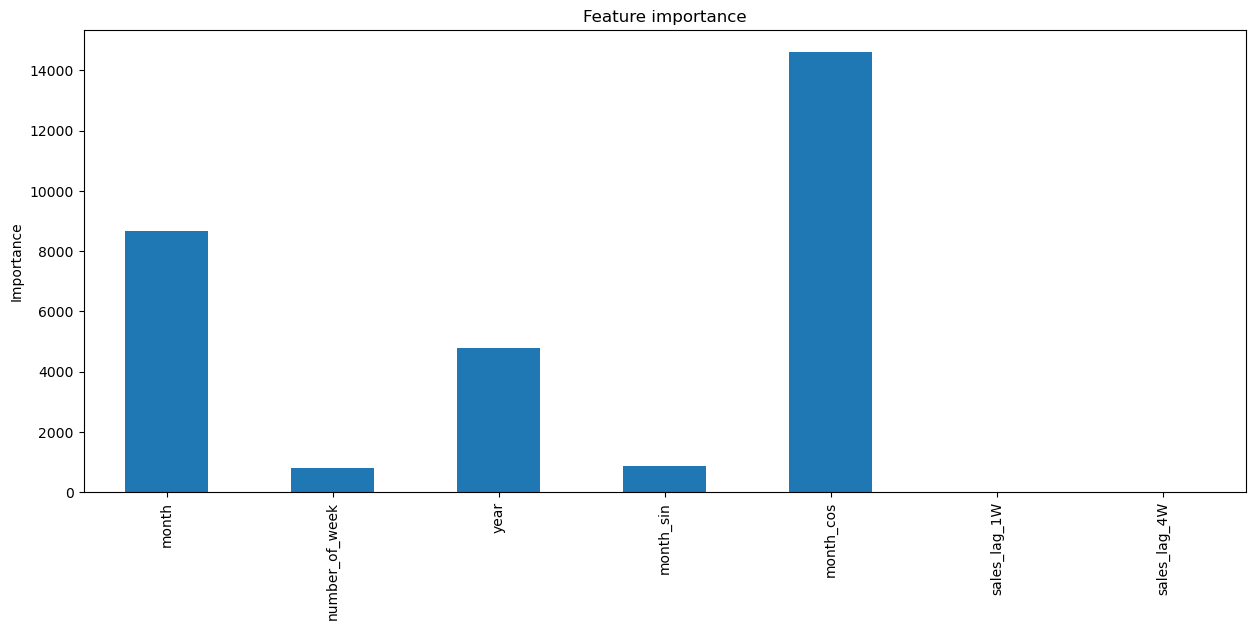

In [104]:
# Let's now plot the feature's importance
# according to the linear model.

import numpy as np

# Create series with feature importance.
tmp = pd.Series(np.abs(linear_model.coef_))

# Let's add the variable names.
tmp.index = X_train.columns

# Let's make a bar plot.
tmp.plot.bar(figsize=(15, 6))
plt.title("Feature importance")
plt.ylabel("Importance")